In [ ]:

# Importando as bibliotecas que iremos trabalhar
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Importar biblioteca para fazer upload do arquivo que iremos trabalhar
from google.colab import files 
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [ ]:
AAPL = pd.read_csv('AAPL.csv')

In [ ]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


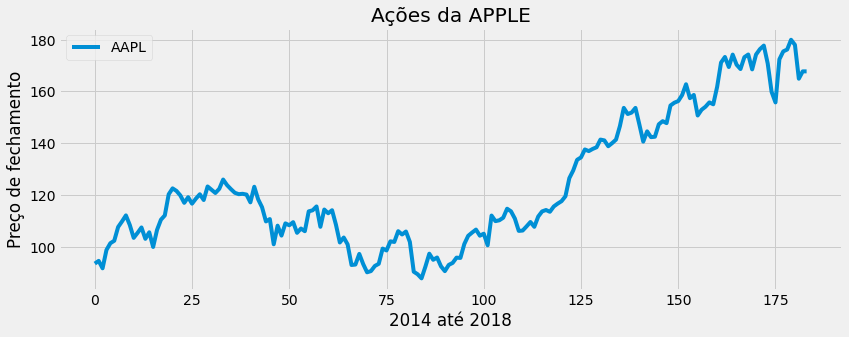

In [ ]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label= 'AAPL')
plt.title('Ações da APPLE')
plt.xlabel('2014 até 2018')
plt.ylabel('Preço de fechamento')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Criando uma simples média móvel de 7 dias

MM7 = pd.DataFrame() # Média Móvel de 7 dias
MM7['Preço de fechamento ajustado'] = AAPL['Adj Close'].rolling(window=7).mean()

In [ ]:
MM7

,Preço de fechamento ajustado
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,170.079533
180,171.109024
181,171.836413
182,173.551429


In [ ]:
# Criar uma média móvel de 30 dias.
MM30 = pd.DataFrame() # Média Móvel de 30 dias
MM30['Preço de fechamento ajustado'] = AAPL['Adj Close'].rolling(window=30).mean()

In [ ]:
MM30

,Preço de fechamento ajustado
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,166.220082
180,166.944129
181,167.154109
182,167.320155


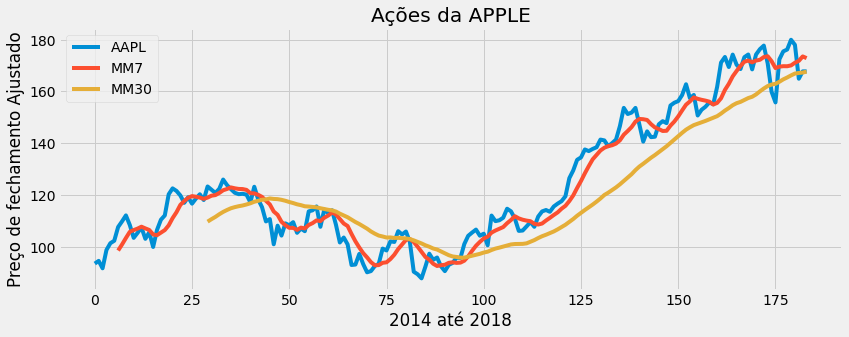

In [ ]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label= 'AAPL')
plt.plot(MM7['Preço de fechamento ajustado'], label= 'MM7')
plt.plot(MM30['Preço de fechamento ajustado'], label= 'MM30')
plt.title('Ações da APPLE')
plt.xlabel('2014 até 2018')
plt.ylabel('Preço de fechamento Ajustado')
plt.legend(loc='upper left')
plt.show()
# Esse gráfico mostra que o melhor momento para comprar é quando a média móvel de 7 dias ultrapassa a média móvel de 30 dias, que em torno dos 96.

In [ ]:
# Criando um data frame para armazenar todos os dados
dados = pd.DataFrame()
dados['AAPL'] = AAPL['Adj Close']
dados['MM7'] = MM7['Preço de fechamento ajustado']
dados['MM30'] = MM30['Preço de fechamento ajustado']


In [ ]:
#Visualizar os dados
dados

,AAPL,MM7,MM30
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,170.079533,166.220082
180,178.020004,171.109024,166.944129
181,164.940002,171.836413,167.154109
182,167.779999,173.551429,167.320155


In [ ]:
# Criar uma função para sinalizar hora de comprar e vender a ação
def buy_sell(dados):
  sigPriceBuy = []
  sigPricesell = []
  flag = -1

  for i in range(len(dados)):
    if dados['MM7'][i] < dados['MM30'][i]:
      if flag != 1:
        sigPriceBuy.append(dados['AAPL'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif dados['MM7'][i] > dados['MM30'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(dados['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPricesell.append(np.nan)
  return (sigPriceBuy, sigPricesell)

In [ ]:
# Armazenar dados de compra e venda para uma variável
buy_sell = buy_sell(dados)
dados['Buy_Signal_Price'] = buy_sell[0]
dados['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
dados

,AAPL,MM7,MM30,Buy_Signal_Price,Sell_Signal_Price
0,93.514290,NaN,NaN,NaN,NaN
1,94.556244,NaN,NaN,NaN,NaN
2,91.683792,NaN,NaN,NaN,NaN
3,98.771042,NaN,NaN,NaN,NaN
4,101.380676,NaN,NaN,NaN,NaN
...,...,...,...,...,...
179,179.979996,170.079533,166.220082,NaN,NaN
180,178.020004,171.109024,166.944129,NaN,NaN
181,164.940002,171.836413,167.154109,NaN,NaN
182,167.779999,173.551429,167.320155,NaN,NaN


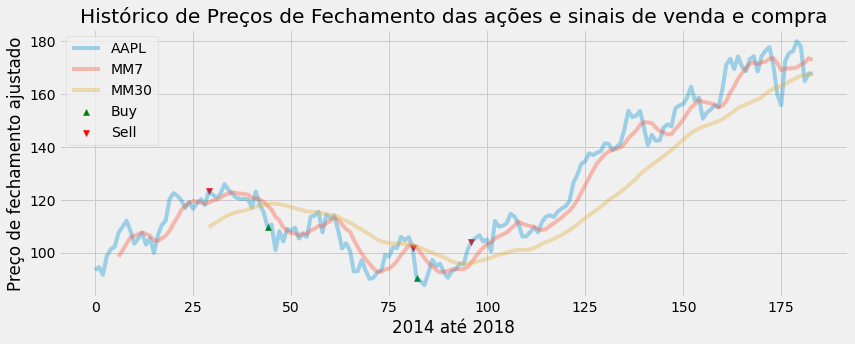

In [ ]:
# Ver o gráfico e a estratégica
plt.figure(figsize=(12.6, 4.6))
plt.plot(dados['AAPL'], label= 'AAPL', alpha = 0.35)
plt.plot(dados['MM7'], label= 'MM7', alpha = 0.35)
plt.plot(dados['MM30'], label='MM30', alpha = 0.35)
plt.scatter(dados.index, dados['Buy_Signal_Price'], label = 'Buy', marker='^', color= 'green')
plt.scatter(dados.index, dados['Sell_Signal_Price'], label = 'Sell', marker='v', color='red')
plt.title('Histórico de Preços de Fechamento das ações e sinais de venda e compra')
plt.xlabel('2014 até 2018')
plt.ylabel('Preço de fechamento ajustado')
plt.legend(loc='upper left')
plt.show()